In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [9]:
df_1 = pd.read_csv('/content/drive/MyDrive/Tweet Sentiment Analysis/2020-07-09 till 2020-09-19.csv')
df_1

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-07-09 11:34:08,Liverpool,697325,594,Liverpool FC,Liverpool,0,LivEchoLFC,#liverpoolfc OR #YNWA OR #LFC,This is a strange claim #LFC https://t.co/U1...,1281189890936504320,Liverpool FC News,-0.2023,EPL,Liverpool
1,2020-07-09 11:33:52,Liverpool,2348,2907,Liverpool FC,Huyton,65,ged11lfc,#liverpoolfc OR #YNWA OR #LFC,RT @TheKopiteOFF: 😱| #LFC have won 30 of their...,1281189827468279808,Ged Smith,0.8316,EPL,Liverpool
2,2020-07-09 11:33:52,Liverpool,465,177,Liverpool FC,"Accra, Ghana",32,calvin_winzy,#liverpoolfc OR #YNWA OR #LFC,RT @SkySportsPL: 🔴 - #LFC secure first away wi...,1281189824465174528,DADA BA♐,0.8793,EPL,Liverpool
3,2020-07-09 11:33:50,Liverpool,334,1524,Liverpool FC,NaN,0,Rurs1,#liverpoolfc OR #YNWA OR #LFC,Outrageous... Poor auld Martin Tyler has to ju...,1281189816890245121,Ruairi Nolan,-0.6808,EPL,Liverpool
4,2020-07-09 11:33:31,Liverpool,760,1264,Liverpool FC,"Kildare, Ireland 🇮🇪",176,LSHighVoltage,#liverpoolfc OR #YNWA OR #LFC,RT @TheRedmenTV: ✅ Won the league ✅ Fastest te...,1281189739618611200,🇮🇪 David D'Arcy 🇮🇪,0.8176,EPL,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799235,2020-08-11 17:16:08,Southampton,947,1528,Southampton FC,"England, United Kingdom, 🇬🇧",0,LoopilouI,#SouthamptonFC OR #Southampton,I honestly don't understand &amp; think it's d...,1293234760299483136,SunThruTheRain🌈,-0.4391,EPL,Southampton
799236,2020-08-11 17:15:17,Southampton,1887,1675,Southampton FC,"Southampton, England",0,FieldPalmer,#SouthamptonFC OR #Southampton,Fantastically positioned in highly sought afte...,1293234544187969538,Field Palmer Estate Agents,0.6428,EPL,Southampton
799237,2020-08-11 17:12:32,Southampton,934,1468,Southampton FC,Sheffield,0,johnjpkennedy,#SouthamptonFC OR #Southampton,@SkySportsNews Not a bad player tbh hope #Sout...,1293233854539595778,John Kennedy,0.8248,EPL,Southampton
799238,2020-08-11 17:07:20,Southampton,84753,2118,Southampton FC,NaN,12,NicoSchira,#SouthamptonFC OR #Southampton,Now is official! Pierre-Emile #Højbjerg to #To...,1293232545052712965,Nicolò Schira,0.0000,EPL,Southampton


In [10]:
df_2 = pd.read_csv('/content/drive/MyDrive/Tweet Sentiment Analysis/2020-09-20 till 2020-10-13.csv')
df_2

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-09-23 18:39:34,CrystalPalace,66,495,Crystal Palace FC,NaN,0,tw_footballtalk,#CrystalPalace OR #CPFC,Onto Week 2 of Premier League Stars of the Wee...,1308838436233711616,TW,0.0000,EPL,CrystalPalace
1,2020-09-23 18:39:18,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,Our palace team will put our hearts out for ou...,1308838367254269954,crystalpalacedan,0.1531,EPL,CrystalPalace
2,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Chelsea v Palace kick-off time changed and TV ...,1308835588229996545,Crystal Palace News,0.0000,EPL,CrystalPalace
3,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Academy redevelopment update: Exclusive footag...,1308835585902116867,Crystal Palace News,0.1280,EPL,CrystalPalace
4,2020-09-23 18:27:39,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,@ChelseaFC I still have no entire clue why us ...,1308835436652105728,crystalpalacedan,-0.1027,EPL,CrystalPalace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211337,2020-09-30 04:45:00,Everton,10962,12153,Everton FC,United Kingdom,0,bash_the_bookie,#Everton OR #EFC,"BTTS, Each Team Over 3 Corners &amp; Each Team...",1311165122849669120,Inplay Challenges,0.0000,EPL,Everton
211338,2020-09-30 04:35:12,Everton,3439,3277,Everton FC,Litherland,0,KevBlank9,#Everton OR #EFC,Matchday ! 💙 #UpTheToffees #EFC #COYB,1311162658687725569,Kev,0.0000,EPL,Everton
211339,2020-09-30 04:28:12,Everton,0,0,Everton FC,NaN,0,futbol_boss,#Everton OR #EFC,First post!! Come ride along and enjoy the bea...,1311160896962678785,Fútbol Boss,0.8264,EPL,Everton
211340,2020-09-30 04:12:52,Everton,31,312,Everton FC,"England, United Kingdom",1,__RobMatthews__,#Everton OR #EFC,New home on the way..... #EFC #Everton #Spirit...,1311157039389962247,Rob Matthews,0.0000,EPL,Everton


In [11]:
df_1["search_query"].unique()

array(['#liverpoolfc OR #YNWA OR #LFC', '#Everton OR #EFC',
       '#LeicesterCity OR #LCFC', '#SouthamptonFC OR #Southampton',
       '#Chelsea OR #ChelseaFC #CFC',
       '#ManchesterUnited OR #ManUnited OR #MUFC',
       '#Tottenham OR #THFC OR #SPURS', '#Bournemouth',
       '#ManchesterCity OR #ManCity OR #MCFC', '#Burnley OR #BurnleyFC',
       '#Arsenal OR #AFC OR #COYG', '#CrystalPalace OR #CPFC'],
      dtype=object)

In [12]:
df_2["search_query"].unique()

array(['#CrystalPalace OR #CPFC', '#Chelsea OR #ChelseaFC #CFC',
       '#ManchesterUnited OR #ManUnited OR #MUFC',
       '#Tottenham OR #THFC OR #SPURS', '#Arsenal OR #AFC OR #COYG',
       '#Bournemouth', '#Burnley OR #BurnleyFC',
       '#ManchesterCity OR #ManCity OR #MCFC',
       '#SouthamptonFC OR #Southampton', '#LeicesterCity OR #LCFC',
       '#liverpoolfc OR #YNWA OR #LFC', '#Everton OR #EFC'], dtype=object)

In [13]:
df = pd.concat([df_1,df_2])
df

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-07-09 11:34:08,Liverpool,697325,594,Liverpool FC,Liverpool,0,LivEchoLFC,#liverpoolfc OR #YNWA OR #LFC,This is a strange claim #LFC https://t.co/U1...,1281189890936504320,Liverpool FC News,-0.2023,EPL,Liverpool
1,2020-07-09 11:33:52,Liverpool,2348,2907,Liverpool FC,Huyton,65,ged11lfc,#liverpoolfc OR #YNWA OR #LFC,RT @TheKopiteOFF: 😱| #LFC have won 30 of their...,1281189827468279808,Ged Smith,0.8316,EPL,Liverpool
2,2020-07-09 11:33:52,Liverpool,465,177,Liverpool FC,"Accra, Ghana",32,calvin_winzy,#liverpoolfc OR #YNWA OR #LFC,RT @SkySportsPL: 🔴 - #LFC secure first away wi...,1281189824465174528,DADA BA♐,0.8793,EPL,Liverpool
3,2020-07-09 11:33:50,Liverpool,334,1524,Liverpool FC,NaN,0,Rurs1,#liverpoolfc OR #YNWA OR #LFC,Outrageous... Poor auld Martin Tyler has to ju...,1281189816890245121,Ruairi Nolan,-0.6808,EPL,Liverpool
4,2020-07-09 11:33:31,Liverpool,760,1264,Liverpool FC,"Kildare, Ireland 🇮🇪",176,LSHighVoltage,#liverpoolfc OR #YNWA OR #LFC,RT @TheRedmenTV: ✅ Won the league ✅ Fastest te...,1281189739618611200,🇮🇪 David D'Arcy 🇮🇪,0.8176,EPL,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211337,2020-09-30 04:45:00,Everton,10962,12153,Everton FC,United Kingdom,0,bash_the_bookie,#Everton OR #EFC,"BTTS, Each Team Over 3 Corners &amp; Each Team...",1311165122849669120,Inplay Challenges,0.0000,EPL,Everton
211338,2020-09-30 04:35:12,Everton,3439,3277,Everton FC,Litherland,0,KevBlank9,#Everton OR #EFC,Matchday ! 💙 #UpTheToffees #EFC #COYB,1311162658687725569,Kev,0.0000,EPL,Everton
211339,2020-09-30 04:28:12,Everton,0,0,Everton FC,NaN,0,futbol_boss,#Everton OR #EFC,First post!! Come ride along and enjoy the bea...,1311160896962678785,Fútbol Boss,0.8264,EPL,Everton
211340,2020-09-30 04:12:52,Everton,31,312,Everton FC,"England, United Kingdom",1,__RobMatthews__,#Everton OR #EFC,New home on the way..... #EFC #Everton #Spirit...,1311157039389962247,Rob Matthews,0.0000,EPL,Everton


In [14]:
df["created_at"] = pd.to_datetime(df["created_at"])
df.dtypes

created_at       datetime64[ns]
file_name                object
followers                 int64
friends                   int64
group_name               object
location                 object
retweet_count             int64
screenname               object
search_query             object
text                     object
twitter_id                int64
username                 object
polarity                float64
partition_0              object
partition_1              object
dtype: object

In [15]:
df = df.convert_dtypes()
df.dtypes

created_at       datetime64[ns]
file_name                string
followers                 Int64
friends                   Int64
group_name               string
location                 string
retweet_count             Int64
screenname               string
search_query             string
text                     string
twitter_id                Int64
username                 string
polarity                float64
partition_0              string
partition_1              string
dtype: object

In [16]:
df.rename(columns = {'file_name' : 'club_name'},inplace = True)


In [17]:

import re

df_work = df[["created_at", "club_name","username", "text", "polarity"]]

df_work = df_work.sort_values(by = "created_at")
df_work['tweet'] = df_work['text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

polarity = df_work['polarity'].to_list()

len(df_work)


1010582

Text(0.5, 1.0, 'Distribution of Sentiments')

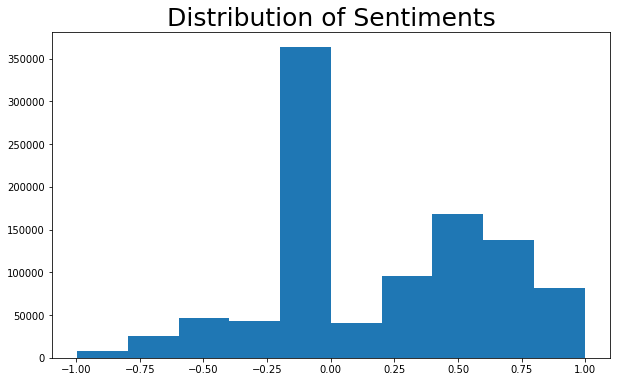

In [18]:
plt.figure(figsize = (10,6))
plt.hist(df_work["polarity"])
plt.title("Distribution of Sentiments",fontsize = 25)

In [19]:
df_work["sentiment"] = None
sent = []
for i in polarity:
  if i >= 0.8:
    sent.append("Extremely Positive")
  elif i > 0.05 and i < 0.8:
    sent.append("Fairly Positive")
  elif i <= 0.05 and i >= (-0.05):
    sent.append("Fairly Neutral")
  elif i>=(-0.8) and i<(-0.05):
    sent.append("Fairly Negative")
  elif i< (-0.8):
    sent.append("Extremely Negative")
  else:
    print(i, "Error")
    break
df_work["sentiment"] = sent 
df_work

,created_at,club_name,username,text,polarity,tweet,sentiment
13974,2020-07-08 05:46:21,Burnley,dave ormerod,RT @BurnleyEmpire: Tomorrow we'll be launching...,0.4019,RT Tomorrow we ll be launching a to help raise...,Fairly Positive
13973,2020-07-08 06:17:38,Burnley,Alison Clews,"RT @ScottBrerton: Outside of #London, #EastLan...",-0.4019,RT Outside of London EastLancashire is expecte...,Fairly Negative
13972,2020-07-08 06:30:06,Burnley,Sports Chat Place,West Ham vs. Burnley 7/8/20 English Premier Le...,0.0000,West Ham vs Burnley 7 8 20 English Premier Lea...,Fairly Neutral
13971,2020-07-08 06:45:00,Burnley,Bᴜʀɴʟᴇʏsᴛᴀᴛs / Dave Roberts 📶,📶 Burnley have won just 4 top-flight away game...,0.7579,Burnley have won just 4 top flight away games ...,Fairly Positive
13970,2020-07-08 06:51:44,Burnley,𝗧𝘂𝗿𝗳𝗖𝗮𝘀𝘁 𝗣𝗼𝗱𝗰𝗮𝘀𝘁,🤝 MATCHDAY 💥 #twitterclarets #BurnleyFC #WHU...,0.0000,MATCHDAY twitterclarets BurnleyFC WHUBUR,Fairly Neutral
...,...,...,...,...,...,...,...
104121,2020-10-12 23:57:21,ManchesterUnited,*Mr. Goodvibes😉*,@ManUtd please give us a better captain. That ...,0.7845,please give us a better captain That other one...,Fairly Positive
104120,2020-10-12 23:58:27,ManchesterUnited,Red Devils of San Diego - MUSC,We are excited to announce that we will be on ...,0.6351,We are excited to announce that we will be on ...,Fairly Positive
104119,2020-10-12 23:59:12,ManchesterUnited,(((MaskedLefty))),@Winmo18 Wasn’t arguing with you or anything t...,-0.2263,Wasn t arguing with you or anything tho you re...,Fairly Negative
101458,2020-10-12 23:59:18,ManchesterCity,MCFC Buzz,DONE DEAL: Man City winger Roberts re-joins Mi...,0.0000,DONE DEAL Man City winger Roberts re joins Mid...,Fairly Neutral


In [20]:
# df_work["polarity"].isna().sum() 

count             1010582
unique                  5
top       Fairly Positive
freq               436526
Name: sentiment, dtype: object

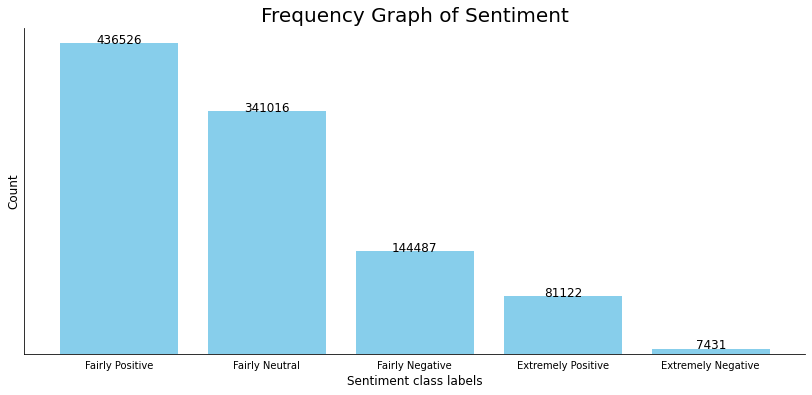

In [21]:
plt.figure(figsize = (14,6))
# xvals = red_wine_df["quality"].unique().tolist()
yvals = df_work["sentiment"].value_counts().to_dict()
# print(xvals)
bars = plt.bar(yvals.keys(),yvals.values(),color ='skyblue')
plt.xlabel("Sentiment class labels",fontsize= 12)
plt.title("Frequency Graph of Sentiment",fontsize= 20)
# plt.gca().yaxis.set_visible(False)
plt.ylabel("Count",fontsize= 12)
plt.tick_params(bottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.yaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticklabels([])
for bar in bars:
  plt.gca().text(bar.get_x() + bar.get_width() / 2,bar.get_height() + 30,str(int(bar.get_height())),
  ha= "center", color ="black",fontsize= 12)
# plt.xlabels("Quality")
df_work["sentiment"].describe()

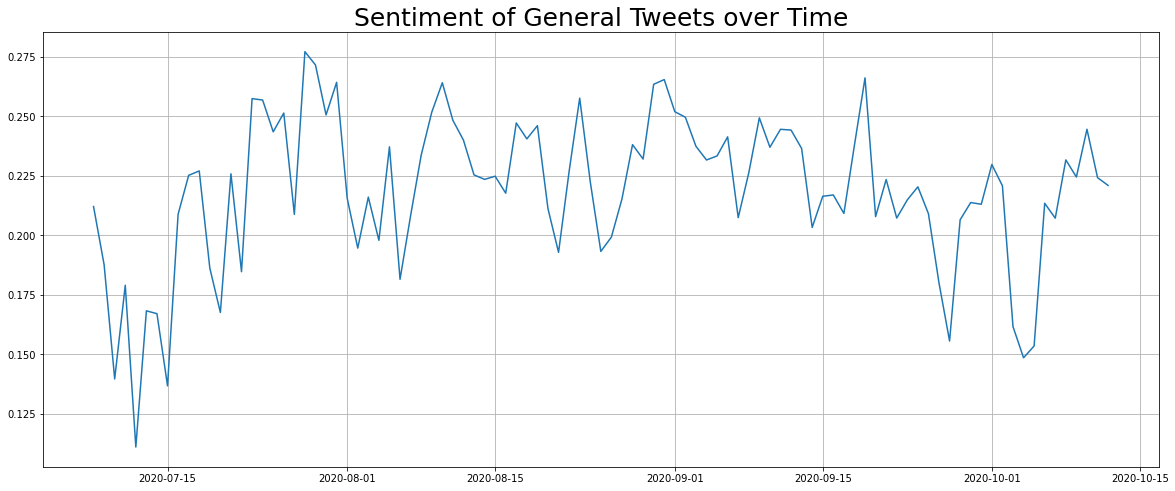

In [22]:
df_work["date"] = df_work["created_at"].dt.date
temp_df = df_work.groupby("date").mean()
# print(club,temp_df)
plt.figure(figsize = (20,8))
plt.plot(temp_df.index.to_list(),temp_df["polarity"])
plt.title("Sentiment of General Tweets over Time", fontsize = 25 )
plt.grid()
plt.show()

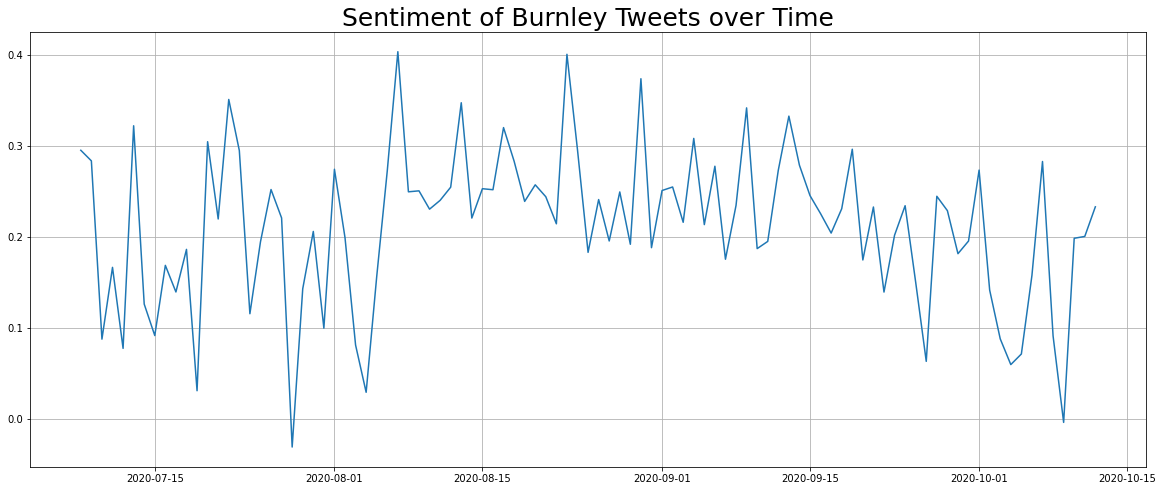

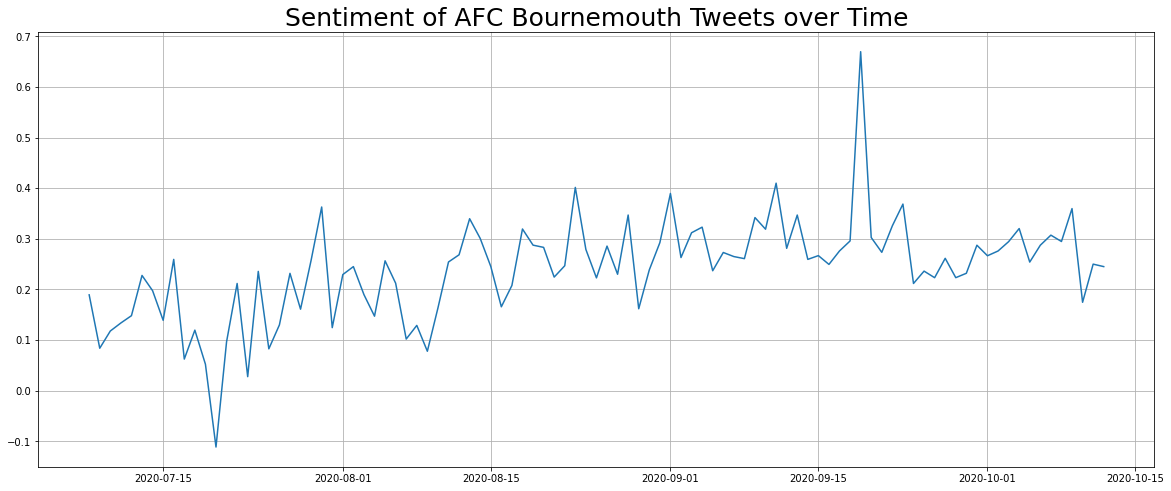

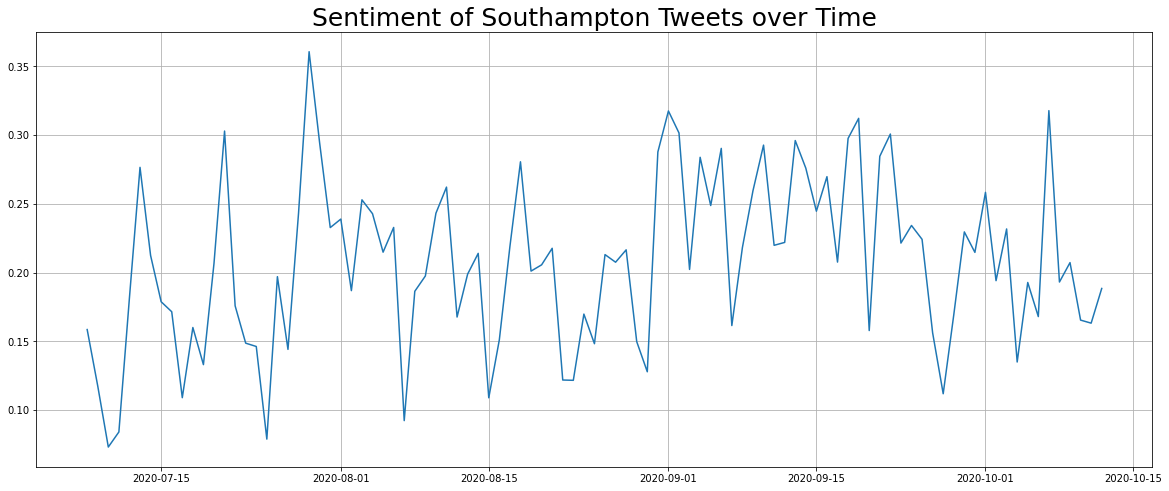

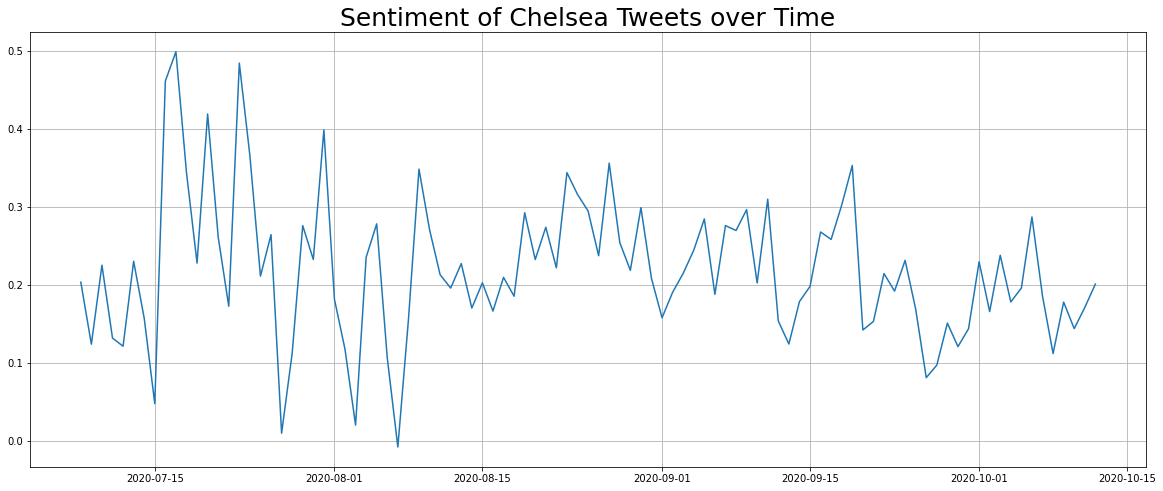

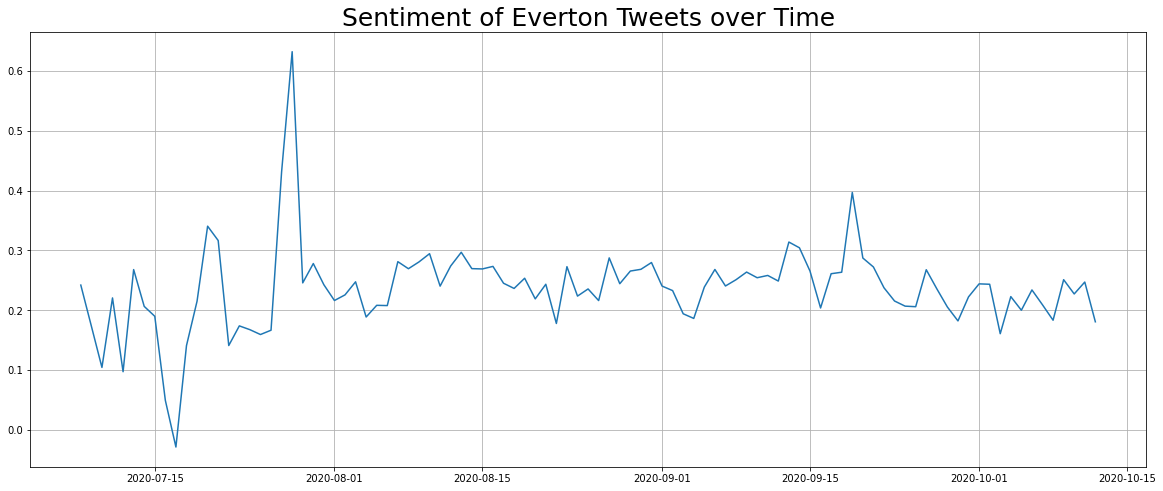

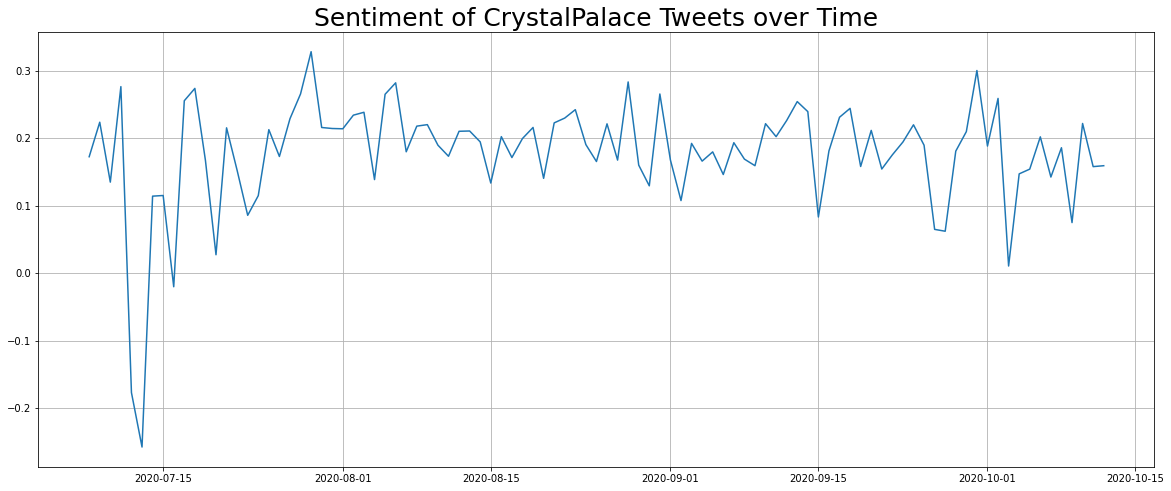

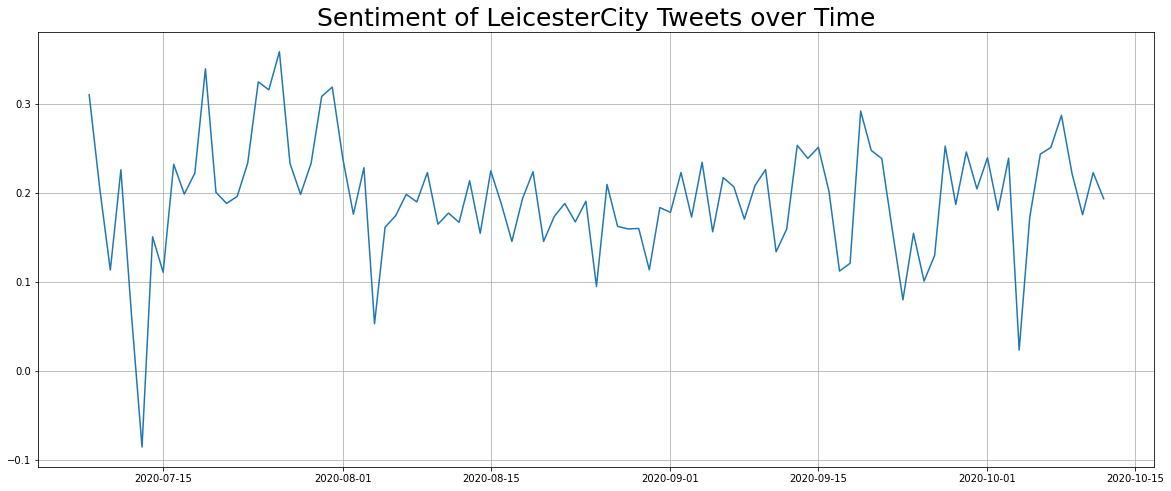

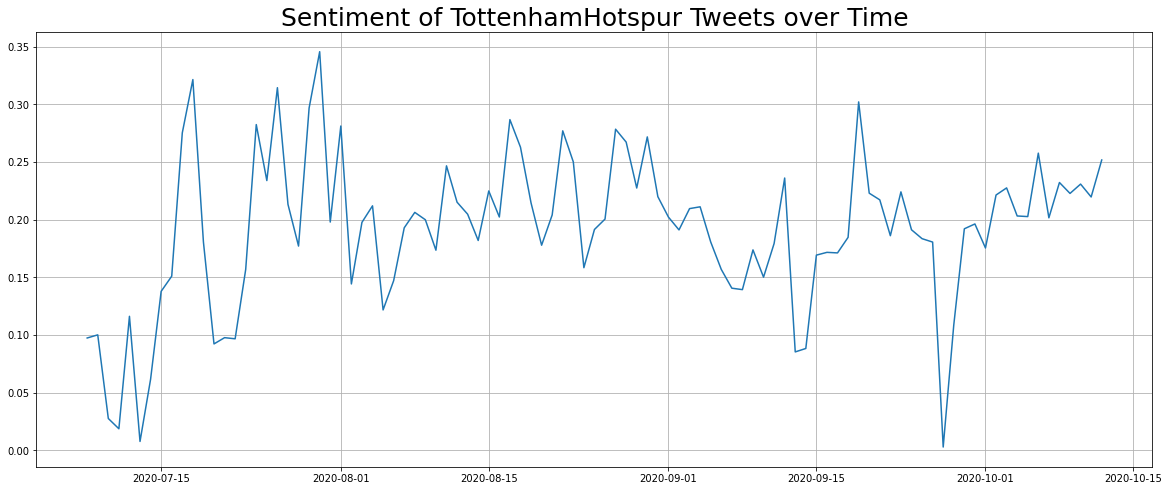

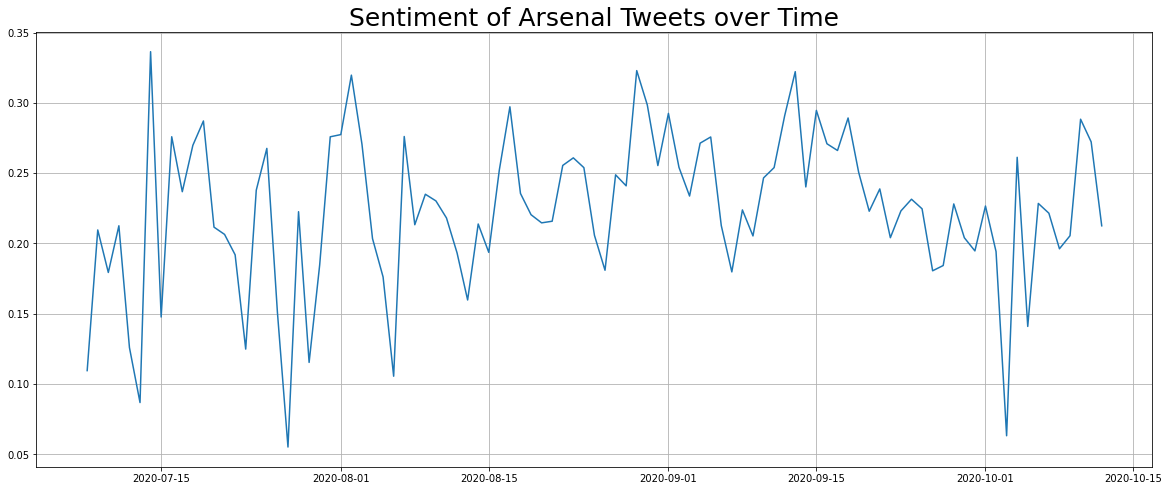

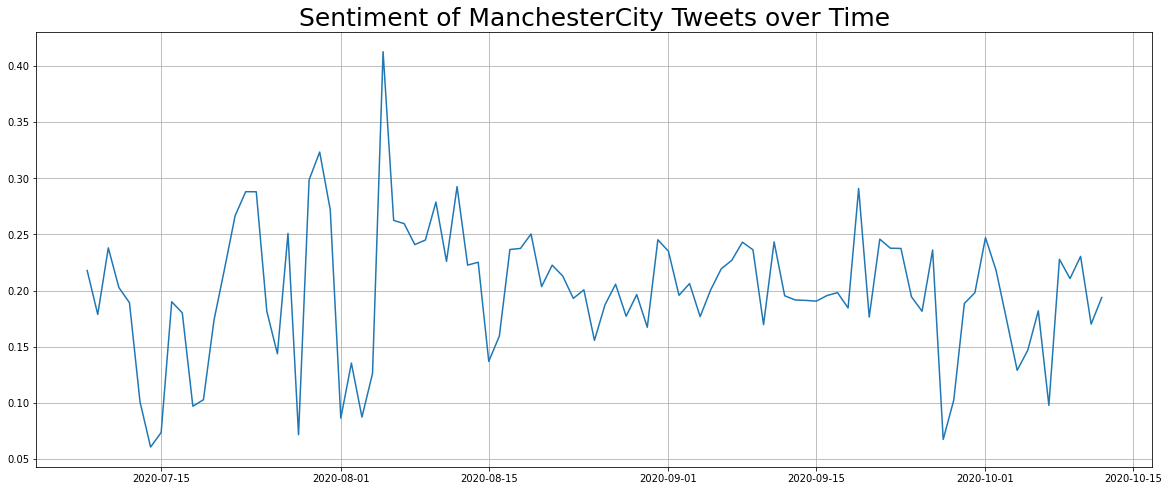

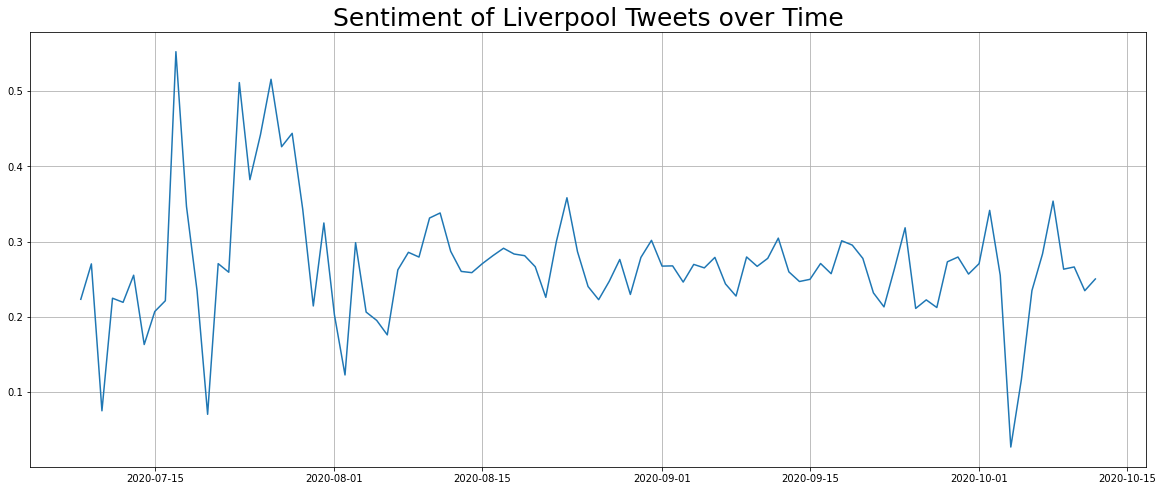

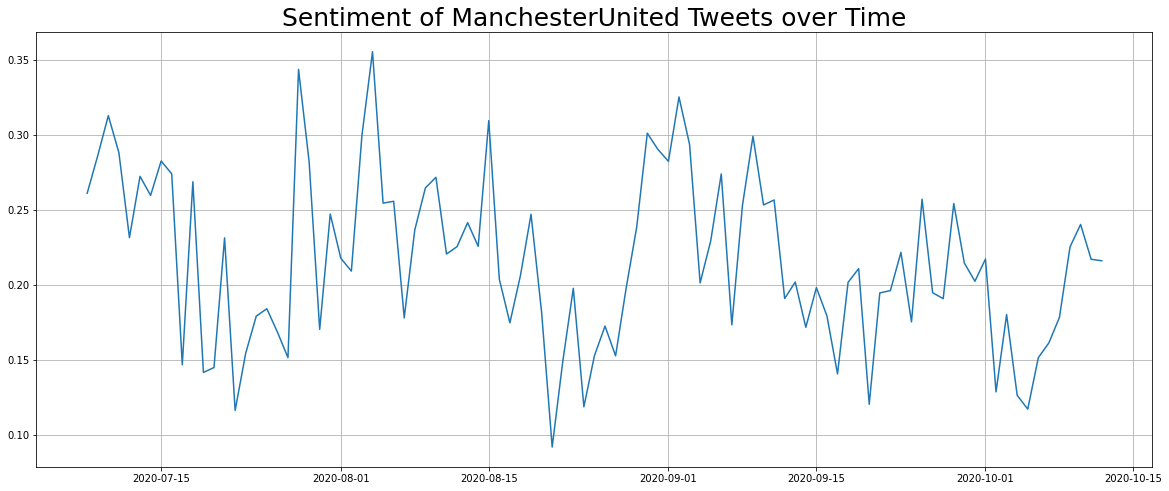

In [23]:
df_work["date"] = df_work["created_at"].dt.date
for i in df_work["club_name"].unique():
  club = i
  temp_df = df_work[df_work["club_name"] == i].groupby("date").mean()
  # print(club,temp_df)
  plt.figure(figsize = (20,8))
  plt.plot(temp_df.index.to_list(),temp_df["polarity"])
  plt.title("Sentiment of "+ i+ " Tweets over Time", fontsize = 25 )
  plt.grid()
  plt.show()
  

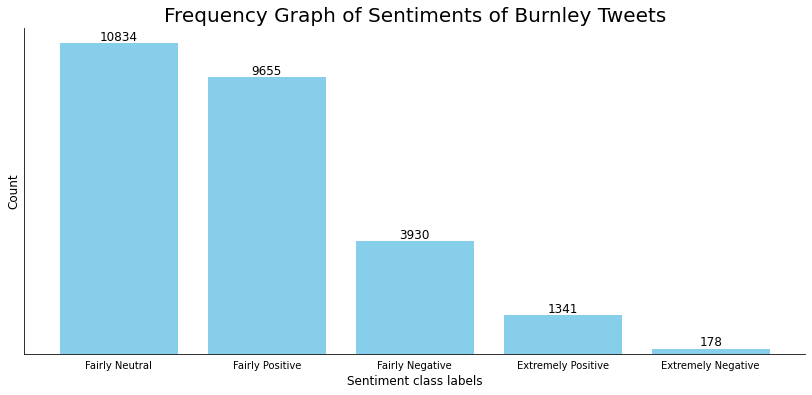

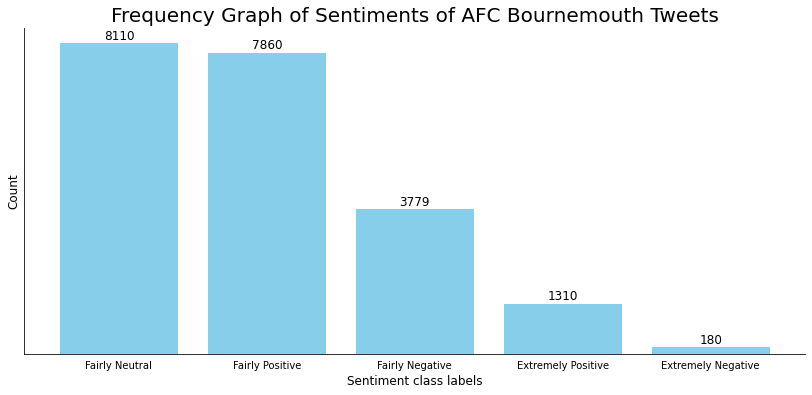

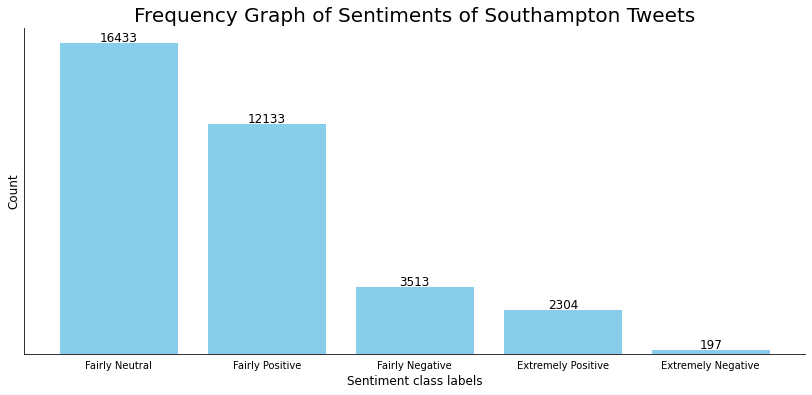

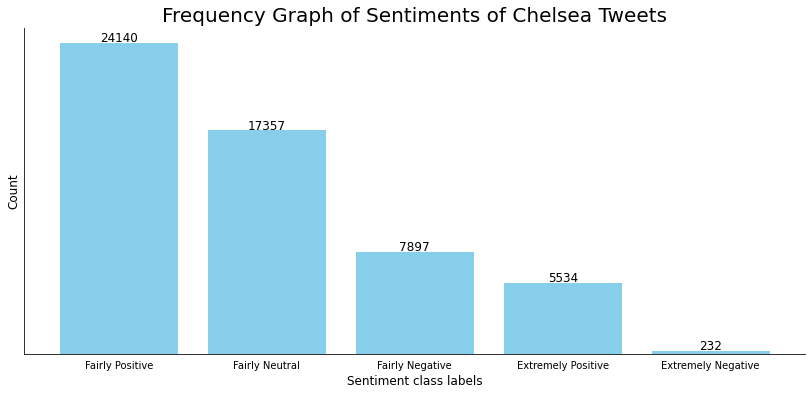

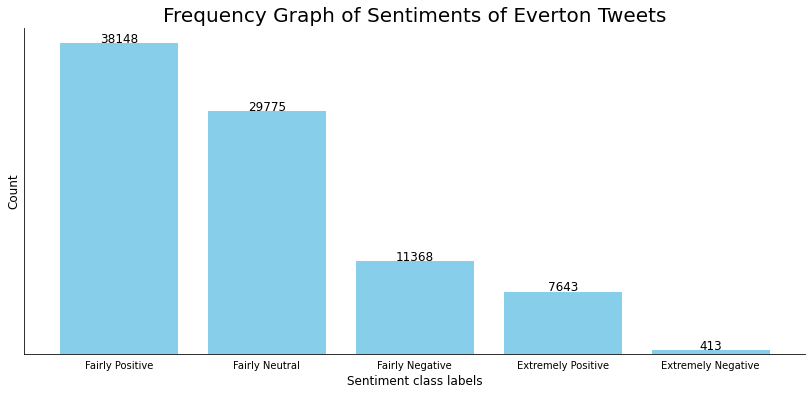

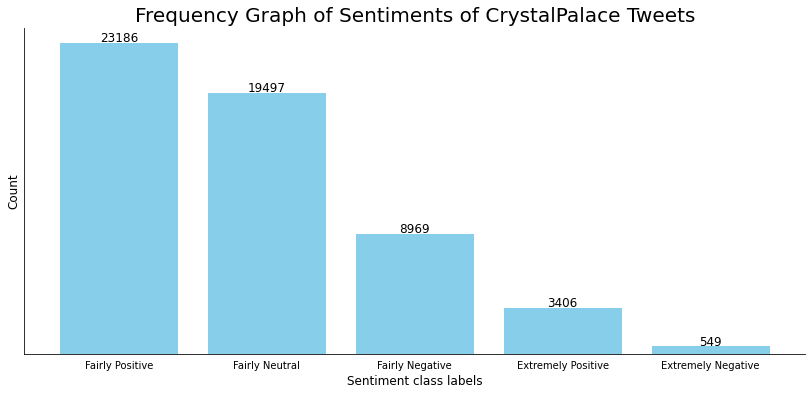

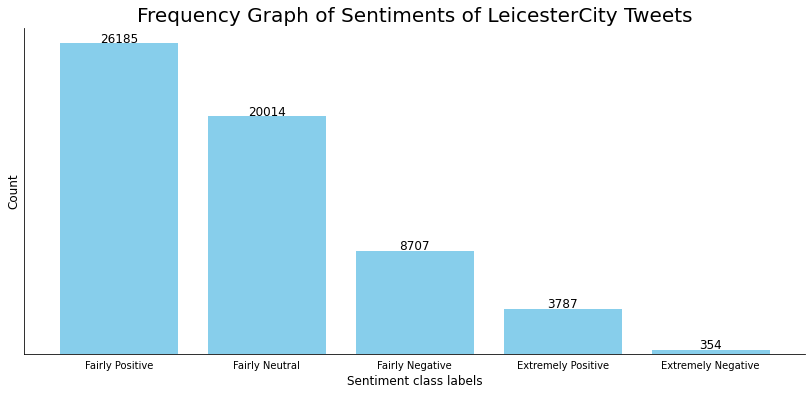

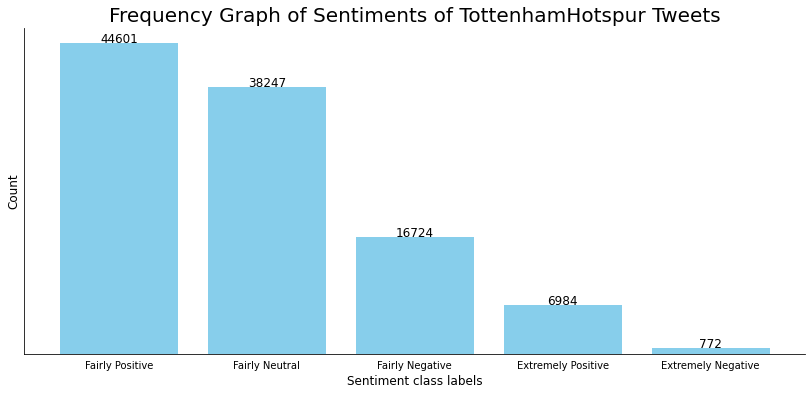

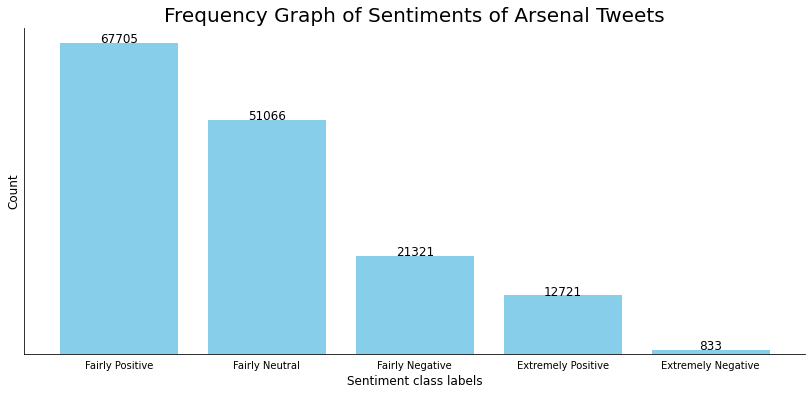

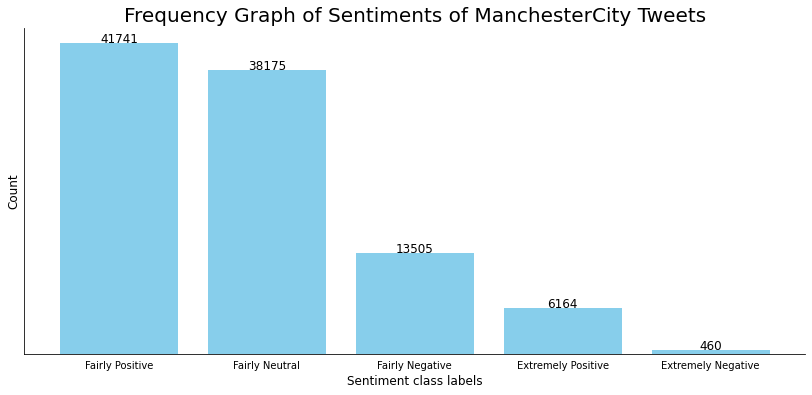

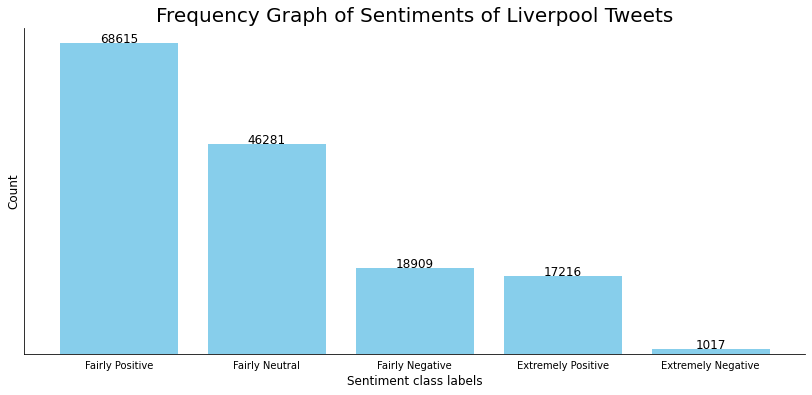

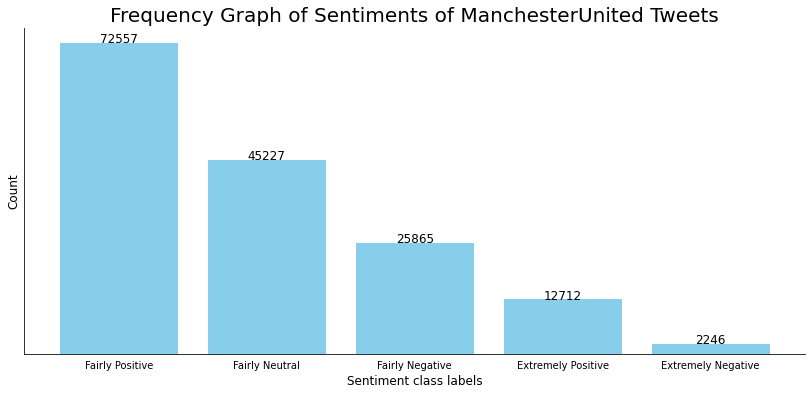

In [24]:
# xvals = red_wine_df["quality"].unique().tolist()
for i in df_work["club_name"].unique():
  club = i
  plt.figure(figsize = (14,6))
  yvals = df_work[df_work["club_name"] == i]["sentiment"].value_counts().to_dict()
  # print(xvals)
  bars = plt.bar(yvals.keys(),yvals.values(),color ='skyblue')
  plt.xlabel("Sentiment class labels",fontsize= 12)
  plt.title("Frequency Graph of Sentiments of "+ i+ " Tweets",fontsize= 20)
  # plt.gca().yaxis.set_visible(False)
  plt.ylabel("Count",fontsize= 12)
  plt.tick_params(bottom=False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().axes.yaxis.set_ticks([])
  plt.gca().axes.yaxis.set_ticklabels([])
  for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width() / 2,bar.get_height() + 100,str(int(bar.get_height())),
    ha= "center", color ="black",fontsize= 12)



In [25]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 9.1MB/s 


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

df_work["vaderscore"] = None
tweets = df_work['tweet'].to_list()
scores = []
vader_sent = []
for i in tweets:
  score= analyser.polarity_scores(i)
  scores.append(score)
  if score['compound']>= 0.8:
    vader_sent.append("Extremely Positive")
  elif score['compound']> 0.05 and score['compound']< 0.8:
    vader_sent.append("Fairly Positive")
  elif score['compound']<= 0.05 and score['compound']>= (-0.05):
    vader_sent.append("Fairly Neutral")
  elif score['compound']>=(-0.8) and score['compound']<(-0.05):
    vader_sent.append("Fairly Negative")
  elif score['compound']< (-0.8):
    vader_sent.append("Extremely Negative")
  else:
    print(score, "Error")
    break

df_work["vaderscore"] = scores
df_work["vadersent"] = vader_sent
df_work


,created_at,club_name,username,text,polarity,tweet,sentiment,date,vaderscore,vadersent
13974,2020-07-08 05:46:21,Burnley,dave ormerod,RT @BurnleyEmpire: Tomorrow we'll be launching...,0.4019,RT Tomorrow we ll be launching a to help raise...,Fairly Positive,2020-07-08,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",Fairly Positive
13973,2020-07-08 06:17:38,Burnley,Alison Clews,"RT @ScottBrerton: Outside of #London, #EastLan...",-0.4019,RT Outside of London EastLancashire is expecte...,Fairly Negative,2020-07-08,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'comp...",Fairly Negative
13972,2020-07-08 06:30:06,Burnley,Sports Chat Place,West Ham vs. Burnley 7/8/20 English Premier Le...,0.0000,West Ham vs Burnley 7 8 20 English Premier Lea...,Fairly Neutral,2020-07-08,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Fairly Neutral
13971,2020-07-08 06:45:00,Burnley,Bᴜʀɴʟᴇʏsᴛᴀᴛs / Dave Roberts 📶,📶 Burnley have won just 4 top-flight away game...,0.7579,Burnley have won just 4 top flight away games ...,Fairly Positive,2020-07-08,"{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",Extremely Positive
13970,2020-07-08 06:51:44,Burnley,𝗧𝘂𝗿𝗳𝗖𝗮𝘀𝘁 𝗣𝗼𝗱𝗰𝗮𝘀𝘁,🤝 MATCHDAY 💥 #twitterclarets #BurnleyFC #WHU...,0.0000,MATCHDAY twitterclarets BurnleyFC WHUBUR,Fairly Neutral,2020-07-08,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Fairly Neutral
...,...,...,...,...,...,...,...,...,...,...
104121,2020-10-12 23:57:21,ManchesterUnited,*Mr. Goodvibes😉*,@ManUtd please give us a better captain. That ...,0.7845,please give us a better captain That other one...,Fairly Positive,2020-10-12,"{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...",Fairly Positive
104120,2020-10-12 23:58:27,ManchesterUnited,Red Devils of San Diego - MUSC,We are excited to announce that we will be on ...,0.6351,We are excited to announce that we will be on ...,Fairly Positive,2020-10-12,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Fairly Positive
104119,2020-10-12 23:59:12,ManchesterUnited,(((MaskedLefty))),@Winmo18 Wasn’t arguing with you or anything t...,-0.2263,Wasn t arguing with you or anything tho you re...,Fairly Negative,2020-10-12,"{'neg': 0.12, 'neu': 0.797, 'pos': 0.084, 'com...",Fairly Negative
101458,2020-10-12 23:59:18,ManchesterCity,MCFC Buzz,DONE DEAL: Man City winger Roberts re-joins Mi...,0.0000,DONE DEAL Man City winger Roberts re joins Mid...,Fairly Neutral,2020-10-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Fairly Neutral


In [27]:
# EValuating VADER Sentiment with given sentiment
def accuracy(a,b):
  count  = 0
  for i in range(len(a)):
    if(a[i] == b[i]):
      count = count + 1
  return (count*100)/len(a)
print(accuracy(df_work["sentiment"].to_list(),df_work["vadersent"].to_list()))

92.87677793588249


In [28]:
df_work

,created_at,club_name,username,text,polarity,tweet,sentiment,date,vaderscore,vadersent
13974,2020-07-08 05:46:21,Burnley,dave ormerod,RT @BurnleyEmpire: Tomorrow we'll be launching...,0.4019,RT Tomorrow we ll be launching a to help raise...,Fairly Positive,2020-07-08,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",Fairly Positive
13973,2020-07-08 06:17:38,Burnley,Alison Clews,"RT @ScottBrerton: Outside of #London, #EastLan...",-0.4019,RT Outside of London EastLancashire is expecte...,Fairly Negative,2020-07-08,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'comp...",Fairly Negative
13972,2020-07-08 06:30:06,Burnley,Sports Chat Place,West Ham vs. Burnley 7/8/20 English Premier Le...,0.0000,West Ham vs Burnley 7 8 20 English Premier Lea...,Fairly Neutral,2020-07-08,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Fairly Neutral
13971,2020-07-08 06:45:00,Burnley,Bᴜʀɴʟᴇʏsᴛᴀᴛs / Dave Roberts 📶,📶 Burnley have won just 4 top-flight away game...,0.7579,Burnley have won just 4 top flight away games ...,Fairly Positive,2020-07-08,"{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",Extremely Positive
13970,2020-07-08 06:51:44,Burnley,𝗧𝘂𝗿𝗳𝗖𝗮𝘀𝘁 𝗣𝗼𝗱𝗰𝗮𝘀𝘁,🤝 MATCHDAY 💥 #twitterclarets #BurnleyFC #WHU...,0.0000,MATCHDAY twitterclarets BurnleyFC WHUBUR,Fairly Neutral,2020-07-08,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Fairly Neutral
...,...,...,...,...,...,...,...,...,...,...
104121,2020-10-12 23:57:21,ManchesterUnited,*Mr. Goodvibes😉*,@ManUtd please give us a better captain. That ...,0.7845,please give us a better captain That other one...,Fairly Positive,2020-10-12,"{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...",Fairly Positive
104120,2020-10-12 23:58:27,ManchesterUnited,Red Devils of San Diego - MUSC,We are excited to announce that we will be on ...,0.6351,We are excited to announce that we will be on ...,Fairly Positive,2020-10-12,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Fairly Positive
104119,2020-10-12 23:59:12,ManchesterUnited,(((MaskedLefty))),@Winmo18 Wasn’t arguing with you or anything t...,-0.2263,Wasn t arguing with you or anything tho you re...,Fairly Negative,2020-10-12,"{'neg': 0.12, 'neu': 0.797, 'pos': 0.084, 'com...",Fairly Negative
101458,2020-10-12 23:59:18,ManchesterCity,MCFC Buzz,DONE DEAL: Man City winger Roberts re-joins Mi...,0.0000,DONE DEAL Man City winger Roberts re joins Mid...,Fairly Neutral,2020-10-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Fairly Neutral


In [29]:
 !pip install transformers

     |████████████████████████████████| 1.8MB 8.1MB/s 
     |████████████████████████████████| 890kB 54.5MB/s 
     |████████████████████████████████| 2.9MB 54.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=c3770744c24311e99325c7f20f994323843a52f4ed8413fd9e179260971cb775
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [30]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer

from torch.utils.data import TensorDataset

import transformers
from transformers import BertForSequenceClassification

import re

In [31]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True, trucation=True)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_work['encoded_sentiment'] = encoder.fit_transform(df_work['sentiment'])

xtrain, xval, ytrain, yval = train_test_split(df_work['tweet'], df_work['encoded_sentiment'], test_size = 0.2)

In [33]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=50, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    xval, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [34]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(yval.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [35]:
model = transformers.BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=5,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [36]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=128)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=128)

In [37]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 1

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [38]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [39]:
import random

seed_val = 0
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda')


In [40]:
model.to(device)

for epoch in tqdm(range(1, epochs+1)):
  
  model.train()
  
  loss_train_total = 0

  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:

      model.zero_grad()
      
      batch = tuple(b.to(device) for b in batch)
      
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }       

      outputs = model(**inputs)
      
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

      optimizer.step()
      scheduler.step()
      
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
      
  tqdm.write(f'\nEpoch {epoch}')
  
  loss_train_avg = loss_train_total/len(dataloader_train)            
  tqdm.write(f'Training loss: {loss_train_avg}')


Epoch 1
Training loss: 0.3099287691850021



In [41]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [42]:
val_loss, predictions, true_vals = evaluate(dataloader_validation)
val_f1 = f1_score_func(predictions, true_vals)

In [43]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  0.20353487985137897
Val F1 =  0.9324822312048986


In [44]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [45]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1
        
print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.9317721913545125


In [46]:
model.save_pretrained('/content/drive/MyDrive/Tweet Sentiment Analysis/')